# Aruci 

## Library

In [85]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pickle


sns.set()

### Import dataset

In [86]:
df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')

df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


### Dataset Shape

In [87]:
df.shape


(7043, 16)

### Dataset Structre

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [89]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique())
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

report(df)

,Column,d_type,unique_sample,n_uniques
0,Customer ID,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7043
1,Tenure Months,int64,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",73
2,Location,object,"[Jakarta, Bandung]",2
3,Device Class,object,"[Mid End, High End, Low End]",3
4,Games Product,object,"[Yes, No, No internet service]",3
5,Music Product,object,"[Yes, No, No internet service]",3
6,Education Product,object,"[No, Yes, No internet service]",3
7,Call Center,object,"[No, Yes]",2
8,Video Product,object,"[No, Yes, No internet service]",3
9,Use MyApp,object,"[No, Yes, No internet service]",3


### Rename columns

In [90]:
df.rename(columns={'Customer ID':'customer_id','Tenure Months':'tenure_months','Location':'location',
                   'Device Class':'device_class', 'Games Product':'games_product', 'Music Product' : 'music_product',
                   'Education Product' : 'education_product', 'Call Center': 'call_center', 'Video Product': 'video_product',
                   'Use MyApp' : 'use_myapp', 'Payment Method': 'payment_method', 'Monthly Purchase (Thou. IDR)':'monthly_purchase', 
                   'Churn Label':'churn_label', 'Longitude': 'longitude', 'Latitude': 'latitude','CLTV (Predicted Thou. IDR)':'cltv'},inplace=True)
df.head()

,customer_id,tenure_months,location,device_class,games_product,music_product,education_product,call_center,video_product,use_myapp,payment_method,monthly_purchase,churn_label,longitude,latitude,cltv
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


## Analyze

0	customer_id	<br>
1	tenure_months	<br>
2	location	<br>
3	device_class	<br>
4	games_product	<br>
5	music_product	<br>
6	education_product	<br>
7	call_center		<br>
8	video_product		<br>
9	use_myapp		<br>
10	payment_method	<br>	
11	monthly_purchase	<br>	
12	churn_label		<br>
13	longitude		<br>
14	latitude	<br>	
15	cltv	<br>

### General Churn

In [91]:
#Piechart churn label 
fig = px.pie(df.groupby('churn_label')['customer_id'].nunique().reset_index(), 
             values='customer_id', 
             names='churn_label')

fig.update_layout(title_text="Churn Label", title_x=0.5, title_y= 0.95)

fig

In [92]:
df.groupby('churn_label')['churn_label'].count()


churn_label
No     5174
Yes    1869
Name: churn_label, dtype: int64

<center>A total of 1869 customers churned and 5174 did not churn.

### Location of the customer

In [93]:
# Piechart Location
fig = px.pie(df.groupby('location')['customer_id'].nunique().reset_index(), 
             values='customer_id', 
             names='location')

fig.update_layout(title_text="Piechart Location", title_x=0.5, title_y= 0.95)

fig

<center>Most customers come from the Jakarta area with the number of customers = 5031 (71.4%) <br>
While in Bandung, the number of customers amounted to = 2012 (28.6%)


### Piechart churn customer by location

In [94]:
#Piechart churn label == yes by location
filtered_data = df[df['churn_label'] == 'Yes']

#Piechart Piechart Churn Customer by location
fig = px.pie(filtered_data.groupby('location')['customer_id'].count().reset_index(), 
             values= 'customer_id', 
             names= 'location')
fig.update_layout(title_text="Piechart Churn Customer by location", title_x=0.48, title_y= 0.95)
fig


<center>Most customers who churn are in the Jakarta location as many as 1323 customers and the rest in Bandung as many as 546 customers.

### Customer's lifetime in the service

In [95]:
fig = px.histogram(df, x="tenure_months", color="churn_label",marginal="box" )
fig.show()

In [96]:
df.groupby('churn_label')['tenure_months'].quantile([.50,.75,.90,.95])

churn_label      
No           0.50    38.0
             0.75    61.0
             0.90    71.0
             0.95    72.0
Yes          0.50    10.0
             0.75    29.0
             0.90    51.0
             0.95    60.0
Name: tenure_months, dtype: float64

In [97]:
df.groupby('churn_label')['tenure_months'].mean()

churn_label
No     37.569965
Yes    17.979133
Name: tenure_months, dtype: float64

<center>
50% of the customers who left the service churned within the first 10 months then the churn started to decrease after 5 months of using the service.

### Monthly Charges

In [98]:
fig = px.histogram(df, x="monthly_purchase", color="churn_label",
                   marginal="box"
                  )
fig.show()

In [99]:
df.groupby('churn_label')['monthly_purchase'].quantile([.50,.75,.95,.99])

churn_label      
No           0.50     83.75250
             0.75    114.92000
             0.95    140.94275
             0.99    149.63000
Yes          0.50    103.54500
             0.75    122.46000
             0.95    137.29300
             0.99    144.47160
Name: monthly_purchase, dtype: float64

In [100]:
df.groupby('churn_label')['monthly_purchase'].mean()

churn_label
No     79.644661
Yes    96.773732
Name: monthly_purchase, dtype: float64

<center>The average monthly cost of customers who have left the service is higher than that of active customers. 

### Call Center

In [102]:
fig = px.bar(df.groupby(['call_center',
                                                'churn_label'])['customer_id'].count().reset_index(),
             x="customer_id",
             y="call_center", 
             color="churn_label", 
             text = 'customer_id'
            )
fig.show()

<center> The churn rate for customers who use a call center is smaller than those who don't use a call center.

### Payment Method

In [101]:
fig = px.pie(df.groupby(['payment_method','churn_label'])['customer_id'].count().reset_index(), 
            values='customer_id', 
            names='churn_label',
            facet_col = 'payment_method',
            color = 'churn_label',
            title = 'Churn rate by customer payment method')

fig.show()

In [103]:
fig = px.bar(df.groupby(['payment_method',
                                                'churn_label'])['customer_id'].count().reset_index(),
             x="customer_id",
             y="payment_method", 
             color="churn_label", 
             text = 'customer_id'
            )
fig.show()

<center>Most customers who churn are customers who use the credit payment method.

### Device classes

In [104]:
fig = px.bar(df.groupby(['device_class',
                                                'churn_label'])['customer_id'].count().reset_index(),
             x="customer_id",
             y="device_class", 
             color="churn_label", 
             text = 'customer_id'
            )
fig.show()

### Correlation Data

Some of the behaviour and services we use that have an effect on churn : <br>
<br>
Games Product <br>
Music Product<br>
Education Product<br>
Call Center<br>
Video Product<br>
Use MyApp<br>
Tenure Month<br>
Monthly Purchase<br>
<br>


In [105]:
df_cpy = df.copy()

In [106]:
df_cpy['churn_label'].replace(to_replace='Yes', value=1, inplace=True)
df_cpy['churn_label'].replace(to_replace='No',  value=0, inplace=True)

df_cpy.head()

,customer_id,tenure_months,location,device_class,games_product,music_product,education_product,call_center,video_product,use_myapp,payment_method,monthly_purchase,churn_label,longitude,latitude,cltv
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,1,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,1,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,1,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,1,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,1,106.816666,-6.2,6942.0


In [107]:
df_dummies = pd.get_dummies(df_cpy[['churn_label','games_product', 'music_product', 'education_product' ,'call_center', 'video_product', 'use_myapp', 'device_class','payment_method','monthly_purchase']], dtype=int)
df_dummies

,churn_label,monthly_purchase,games_product_No,games_product_No internet service,games_product_Yes,music_product_No,music_product_No internet service,music_product_Yes,education_product_No,education_product_No internet service,...,use_myapp_No,use_myapp_No internet service,use_myapp_Yes,device_class_High End,device_class_Low End,device_class_Mid End,payment_method_Credit,payment_method_Debit,payment_method_Digital Wallet,payment_method_Pulsa
0,1,70.005,0,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,0
1,1,91.910,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,1,129.545,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,1,136.240,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,1,134.810,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,27.495,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
7039,0,110.240,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7040,0,134.160,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
7041,0,38.480,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


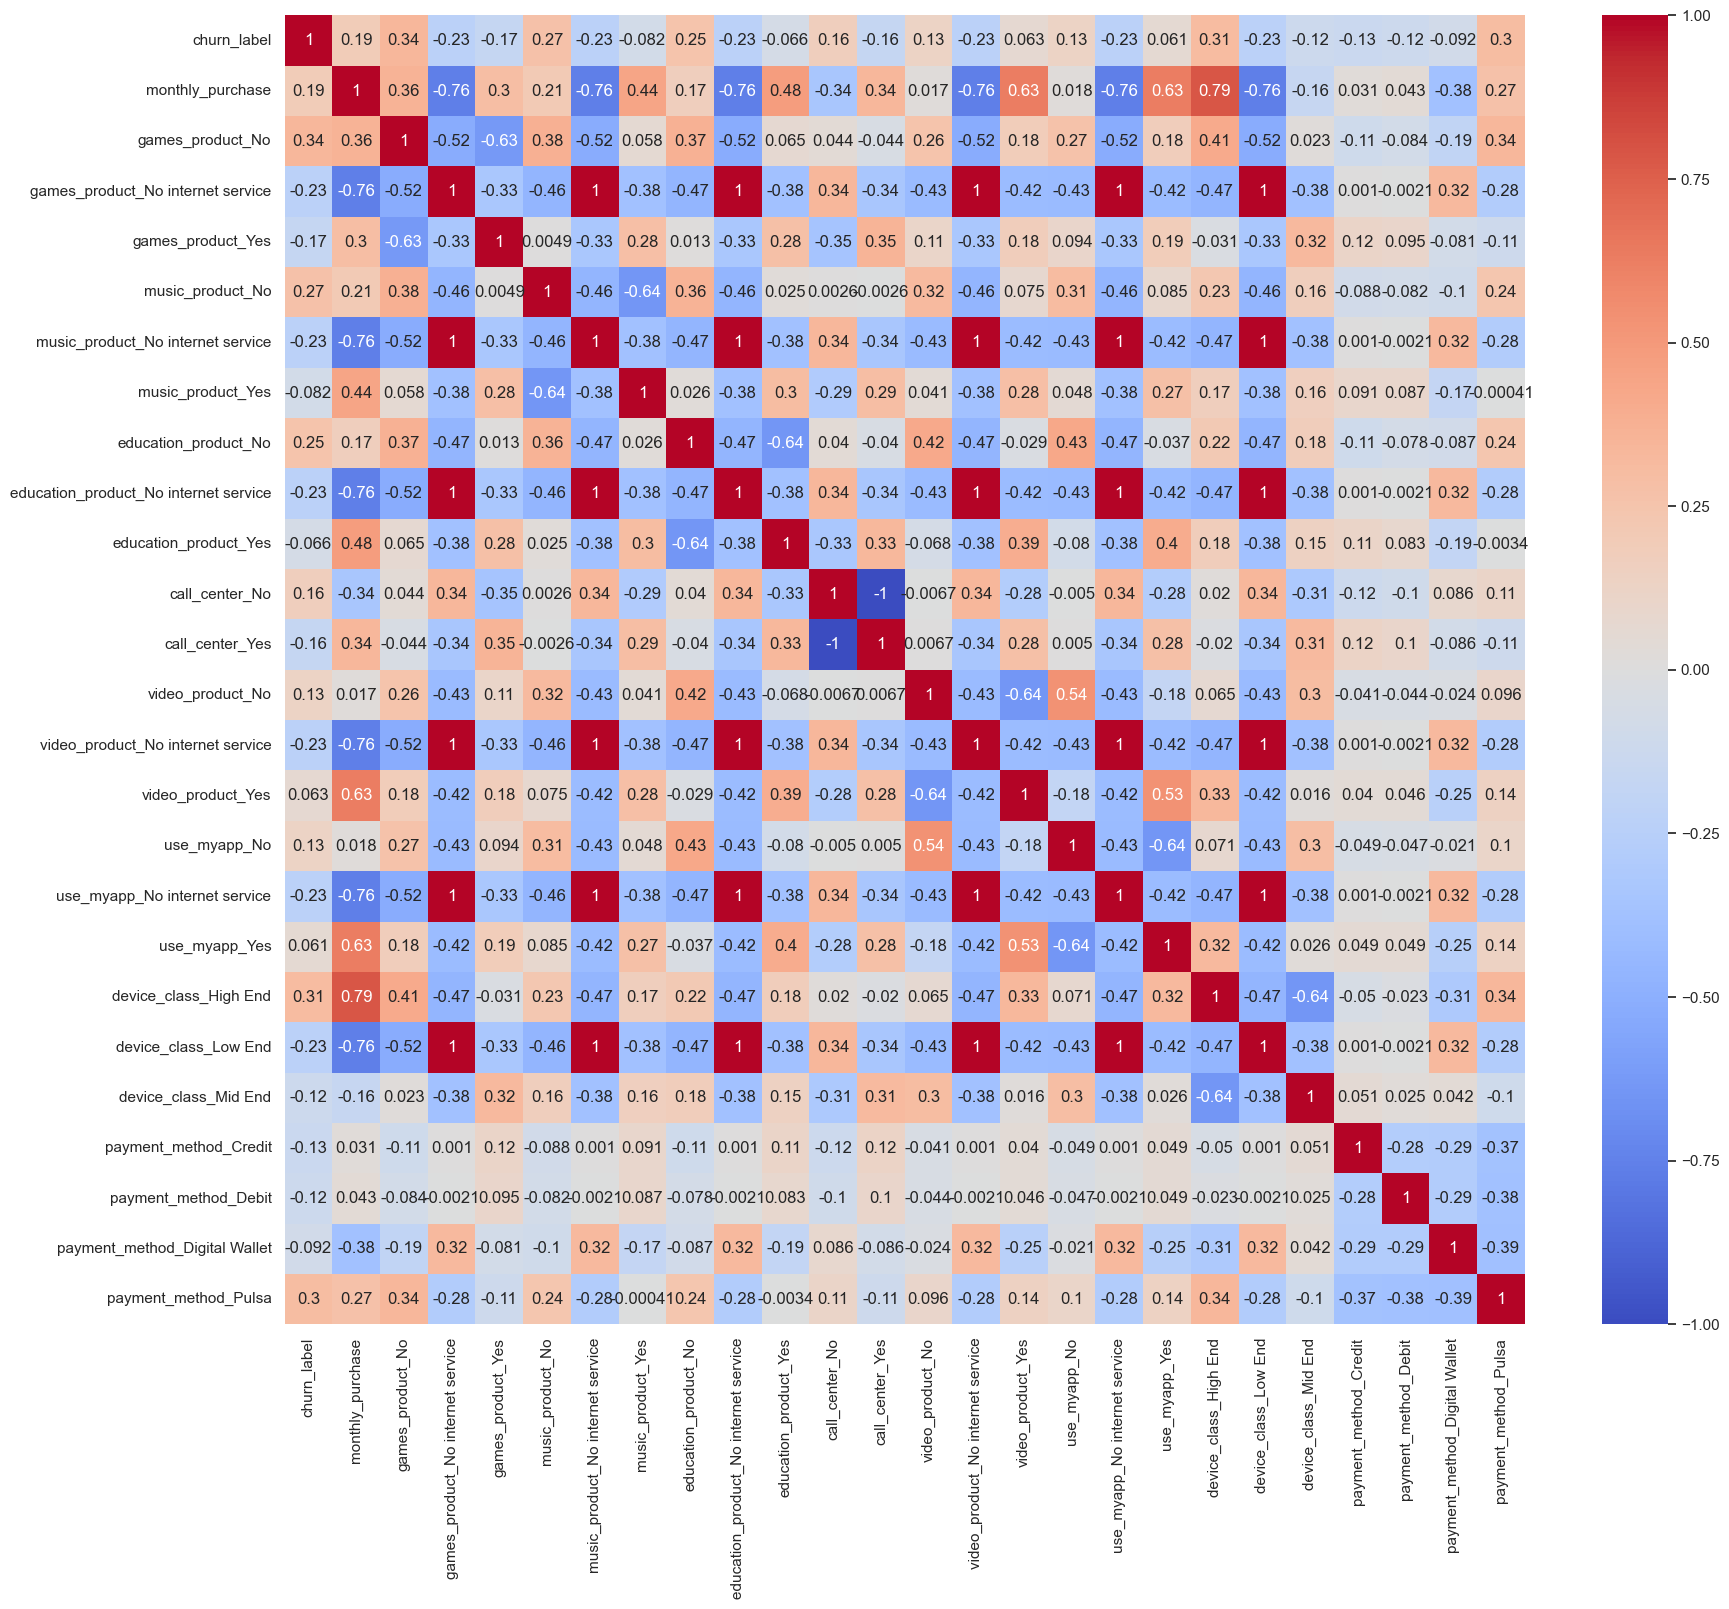

In [108]:
pl.figure(figsize=(20, 17))
sns.heatmap(df_dummies.corr(), annot=True, cmap='coolwarm')

pl.show()

In [109]:
fig = px.bar(df_dummies.corr()['churn_label'].sort_values(ascending = False), 
             color = 'value')
fig.show()

<center>Conclusion :
<br>
The use of the internet for gaming, music, video and educational products is very influential for customers. Based on the correlation, customers who do not use internet services for games, music, video and educational products will potentially churn.


## Data Pre-processing

### Checking Missing Values

In [110]:
report(df_cpy)

,Column,d_type,unique_sample,n_uniques
0,customer_id,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",7043
1,tenure_months,int64,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",73
2,location,object,"[Jakarta, Bandung]",2
3,device_class,object,"[Mid End, High End, Low End]",3
4,games_product,object,"[Yes, No, No internet service]",3
5,music_product,object,"[Yes, No, No internet service]",3
6,education_product,object,"[No, Yes, No internet service]",3
7,call_center,object,"[No, Yes]",2
8,video_product,object,"[No, Yes, No internet service]",3
9,use_myapp,object,"[No, Yes, No internet service]",3


In [111]:
df_cpy.isnull().sum()

customer_id          0
tenure_months        0
location             0
device_class         0
games_product        0
music_product        0
education_product    0
call_center          0
video_product        0
use_myapp            0
payment_method       0
monthly_purchase     0
churn_label          0
longitude            0
latitude             0
cltv                 0
dtype: int64

### Checking duplicate

In [112]:
df_cpy.duplicated().sum()

0

### Checking Outlier

<AxesSubplot:>

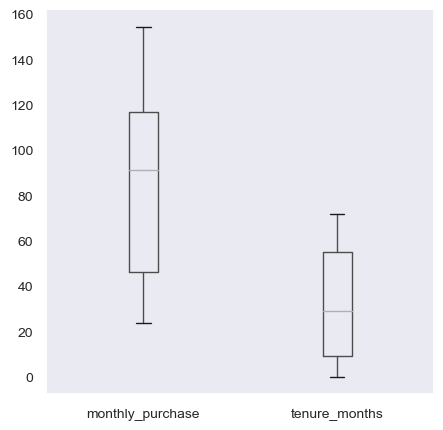

In [113]:
df_cpy.boxplot(column= ['monthly_purchase','tenure_months'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=True)

### Changing categorical variables to numeric

In [114]:
data_mdl = df_cpy.drop(['customer_id','latitude','longitude','location','cltv'], axis = 1)

data_mdl

,tenure_months,device_class,games_product,music_product,education_product,call_center,video_product,use_myapp,payment_method,monthly_purchase,churn_label
0,2,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,1
1,2,High End,No,No,No,No,No,No,Pulsa,91.910,1
2,8,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,1
3,28,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,1
4,49,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,0
7039,24,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,0
7040,72,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,0
7041,11,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,0


In [115]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [116]:
data_mdl = data_mdl.apply(lambda x: encode_data(x))
report(data_mdl)

,Column,d_type,unique_sample,n_uniques
0,tenure_months,int64,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",73
1,device_class,int32,"[2, 0, 1]",3
2,games_product,int32,"[2, 0, 1]",3
3,music_product,int32,"[2, 0, 1]",3
4,education_product,int32,"[0, 2, 1]",3
5,call_center,int32,"[0, 1]",2
6,video_product,int32,"[0, 2, 1]",3
7,use_myapp,int32,"[0, 2, 1]",3
8,payment_method,int32,"[2, 3, 1, 0]",4
9,monthly_purchase,float64,"[70.00500000000001, 91.91000000000001, 129.545...",1585


### Feature scaling

In [117]:
scaler = StandardScaler()

data_mdl[['monthly_purchase','tenure_months']] = scaler.fit_transform(data_mdl[['monthly_purchase','tenure_months']])


## Modeling ML

### Balancing the data

In [119]:
over = SMOTE()

x = data_mdl.drop("churn_label", axis = 1).values
y = data_mdl['churn_label'].values

In [120]:
x,y = over.fit_resample(x,y)

### Validation Model

In [121]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =5, test_size = 0.2)

### Build Model with Evaluation

In [122]:
def model(method, x_train, y_train, x_test, y_test):
    method.fit(x_train, y_train)

    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)

    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    

    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    

    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    

    with open('model','wb') as m :
        pickle.dump(method,m)

In [123]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

ROC AUC:  80.31%
Model accuracy:  80.39%
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1019
           1       0.78      0.85      0.82      1051

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



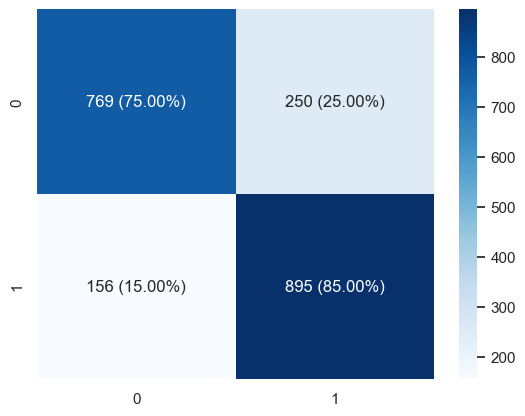

In [124]:
model(xgb,x_train,y_train,x_test,y_test)  